# Movies Ratings DATASET PREDICTION

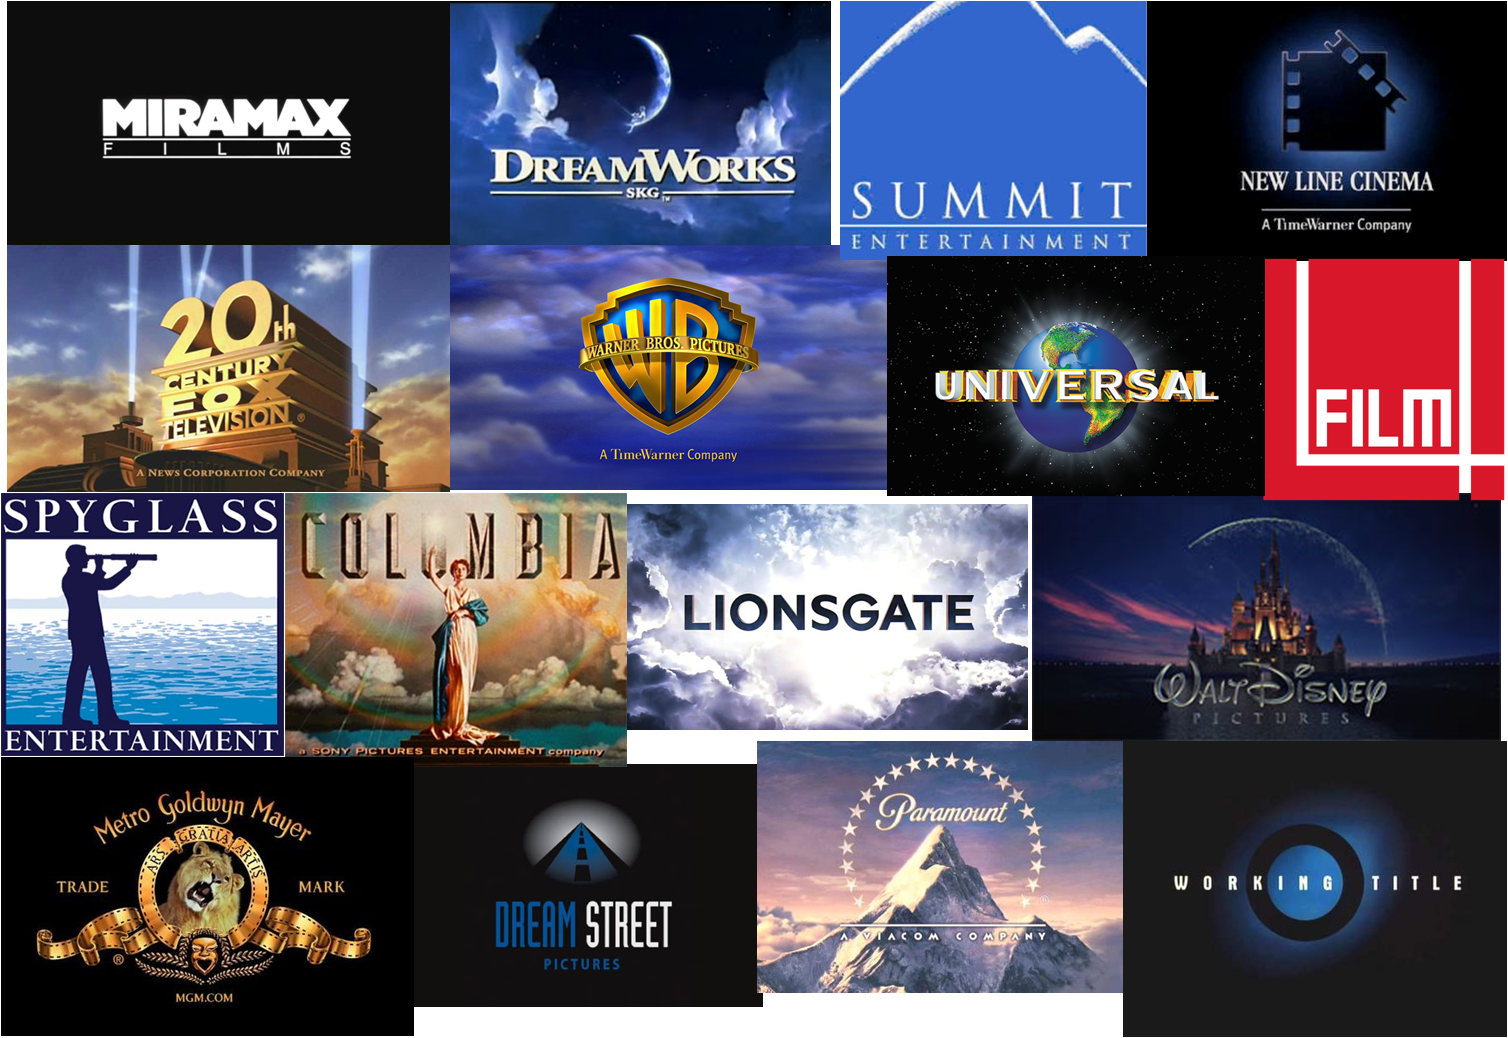

# Import Libraries

In [23]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For statistical data visualization
import seaborn as sns

# For plotting graphs and charts
import matplotlib.pyplot as plt

# For label encoding categorical variables
from sklearn.preprocessing import LabelEncoder as le

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split as tts

# For building a linear regression model
from sklearn.linear_model import  LinearRegression as lr

# For model evaluation
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

 # For evaluating model accuracy
from sklearn.metrics import accuracy_score as rate_score

# Load Movies Dataset

In [24]:
# Load the dataset with handling the possibility of a FileNotFoundError
try:
    movie_data = pd.read_csv("imdb_india_movies.csv", encoding='ISO-8859-1')
except FileNotFoundError:
    print("File not found. Please check the file path.")

# Information About The Dataset

In [25]:
# Display information about the Data, including column names, non-null counts and data types
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null

In [26]:
# Display the first rows of the dataset in a table format
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [27]:
#the shape of the data
movie_data.shape

(15509, 10)

(15509, 10)

In [28]:
#the columns of the data
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Missing Values

In [29]:
# Check for any missing values and sum them up
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [30]:
# descriptive statistics for numerical columns in the Data
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [31]:
# Remove rows with missing values from the Data
movie_data.dropna(inplace=True)

In [32]:
# Recheck for missing values in each column of the Data
movie_data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Numerical Representations

In [33]:
# Convert the 'Year' column to integer type
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

# Remove 'min' string from the 'Duration' column
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

# Convert the 'Votes' column to integer type
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype('int')

In [34]:
# Display information about the Data after data manipulation
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null

In [35]:
# Display the first few rows of the Data
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Visualization

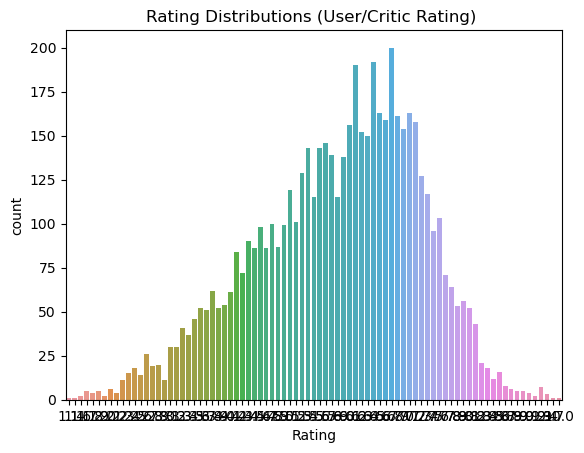

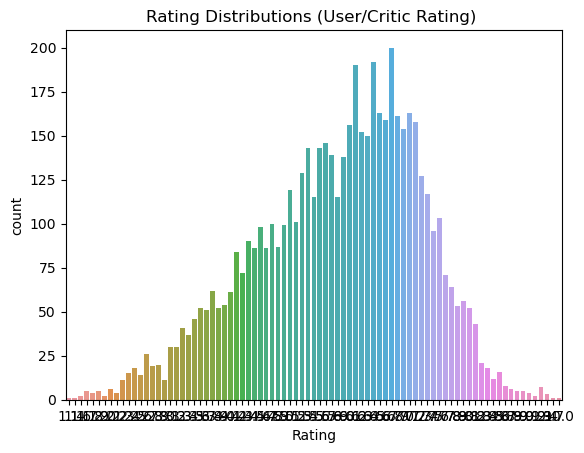

In [36]:
# Visualize the ratings using a count plot
sns.countplot(data = movie_data, x = 'Rating')

# Set the title of the plot
plt.title('Rating Distributions (User/Critic Rating) ')

# Display the plot
plt.show()

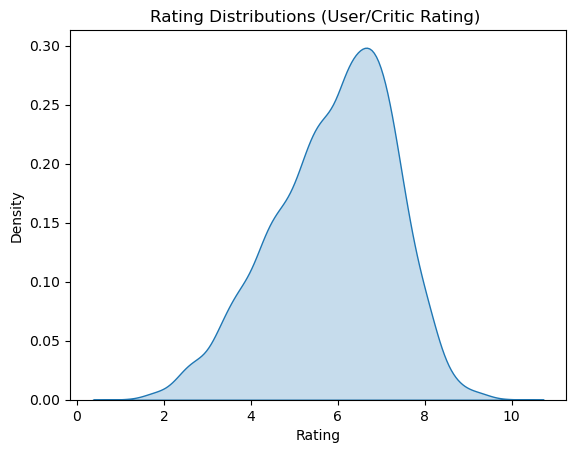

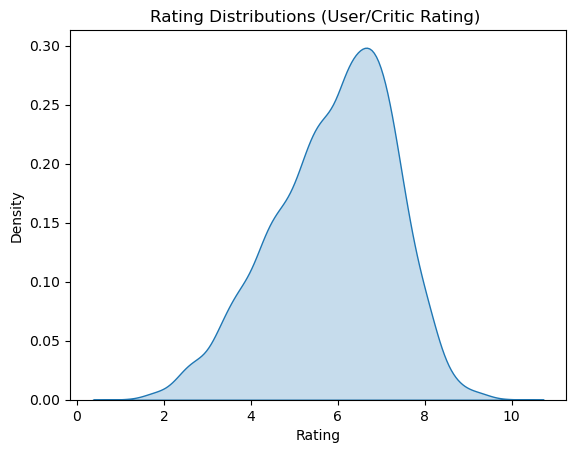

In [37]:
# Visualize the ratings using a kernel density estimate plot
sns.kdeplot(data = movie_data, x = 'Rating', fill = True)

# Set the title of the plot
plt.title('Rating Distributions (User/Critic Rating) ')

# Display the plot
plt.show()

#  Model

In [38]:
# Initialize LabelEncoder object
encoder = le()

# Encode the 'Genre' column
movie_data['Genre'] = encoder.fit_transform(movie_data['Genre'])

# Encode the 'Director' column
movie_data['Director'] = encoder.fit_transform(movie_data['Director'])

# Encode the 'Actor 1' column
movie_data['Actor 1'] = encoder.fit_transform(movie_data['Actor 1'])

# Encode the 'Actor 2' column
movie_data['Actor 2'] = encoder.fit_transform(movie_data['Actor 2'])

# Encode the 'Actor 3' column
movie_data['Actor 3'] = encoder.fit_transform(movie_data['Actor 3'])

# Display the first few rows of the Data after encoding
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


# Training And Testing

In [39]:
# Create a new Data 'movie_data_2' by dropping the 'Name' column
movie_data_2 = movie_data.drop('Name', axis = 1)

# Separate the features (X) and the target variable (Y)
X = movie_data_2.drop('Rating', axis = 1)
Y = movie_data_2['Rating']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.4, random_state = 57)

In [40]:
# Initialize a LinearRegression model
model = lr()

In [41]:
# Fit the LinearRegression model to the training data
model.fit(X_train, Y_train)

LinearRegression()

LinearRegression()

# Predictions

In [42]:
# Use the fitted model to make predictions on the testing data
Y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted Values:", Y_pred)

Predicted Values: [5.52725942 5.97671091 5.67741158 ... 5.63728105 5.69299188 5.79973596]
Predicted Values: [5.52725942 5.97671091 5.67741158 ... 5.63728105 5.69299188 5.79973596]


In [43]:
# Calculate the Mean Absolute Error
print(f"Mean Absolute Error : {mae(Y_test, Y_pred)}")

# Calculate the Mean Squared Error
print(f"Mean Squared Error : {mse(Y_test, Y_pred)}")

Mean Absolute Error : 1.0381456191891016
Mean Squared Error : 1.6870556077672227
Mean Absolute Error : 1.0381456191891016
Mean Squared Error : 1.6870556077672227


In [44]:
# Calculate the Ratings Score
rate_score = r2_score(Y_test, Y_pred)

# Print the Ratings Score
print("Ratings Score:", rate_score)

Ratings Score: 0.09406021428560662
Ratings Score: 0.09406021428560662
